In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'sans-serif'

## Load data and print to keep track

In [9]:
bundles = pd.read_csv('../outputs/results/final_bundles_for_poster.csv')

all_pairs = pd.read_csv('../outputs/results/strong_pairs.csv')

print(f"Loaded {len(bundles)} curated bundles")
print(f"Loaded {len(all_pairs)} total pairs")
print(f"\nLift range (top 10): {bundles['lift'].min():.2f} - {bundles['lift'].max():.2f}")
print(f"Categories: {bundles['category'].nunique()}")
print(f"Cross-category bundles: {(~bundles['is_matching_set']).sum()}")

unique_categories = bundles['category'].unique()
colors_list = cm.tab20(np.linspace(0, 1, len(unique_categories)))
category_colors = {cat: colors_list[i] for i, cat in enumerate(unique_categories)}

print(f"\nGenerated colors for {len(category_colors)} categories")
bundles.head()

Loaded 10 curated bundles
Loaded 545 total pairs

Lift range (top 10): 8.56 - 18.40
Categories: 7
Cross-category bundles: 3

Generated colors for 7 categories


,bundle_name,category,antecedents,consequents,support,confidence,lift,is_matching_set
0,Feltcraft Cushion Duo,Home Decor,FELTCRAFT CUSHION OWL,FELTCRAFT CUSHION RABBIT,0.016692,0.535280,18.396318,True
1,Regency Tea Set,Food & Dining,GREEN REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER,0.029514,0.634067,17.972045,True
2,Musical Harmonica Set,Clothing & Accessories,RED HARMONICA IN BOX,BLUE HARMONICA IN BOX,0.015099,0.476077,15.322806,True
3,Character Lunch Box Pair,Kids,DOLLY GIRL LUNCH BOX,SPACEBOY LUNCH BOX,0.024545,0.596313,14.984576,True
4,Novelty Plasters Duo,Other,PLASTERS IN TIN CIRCUS PARADE,PLASTERS IN TIN SPACEBOY,0.015326,0.479810,12.698585,True


## Bundle details table

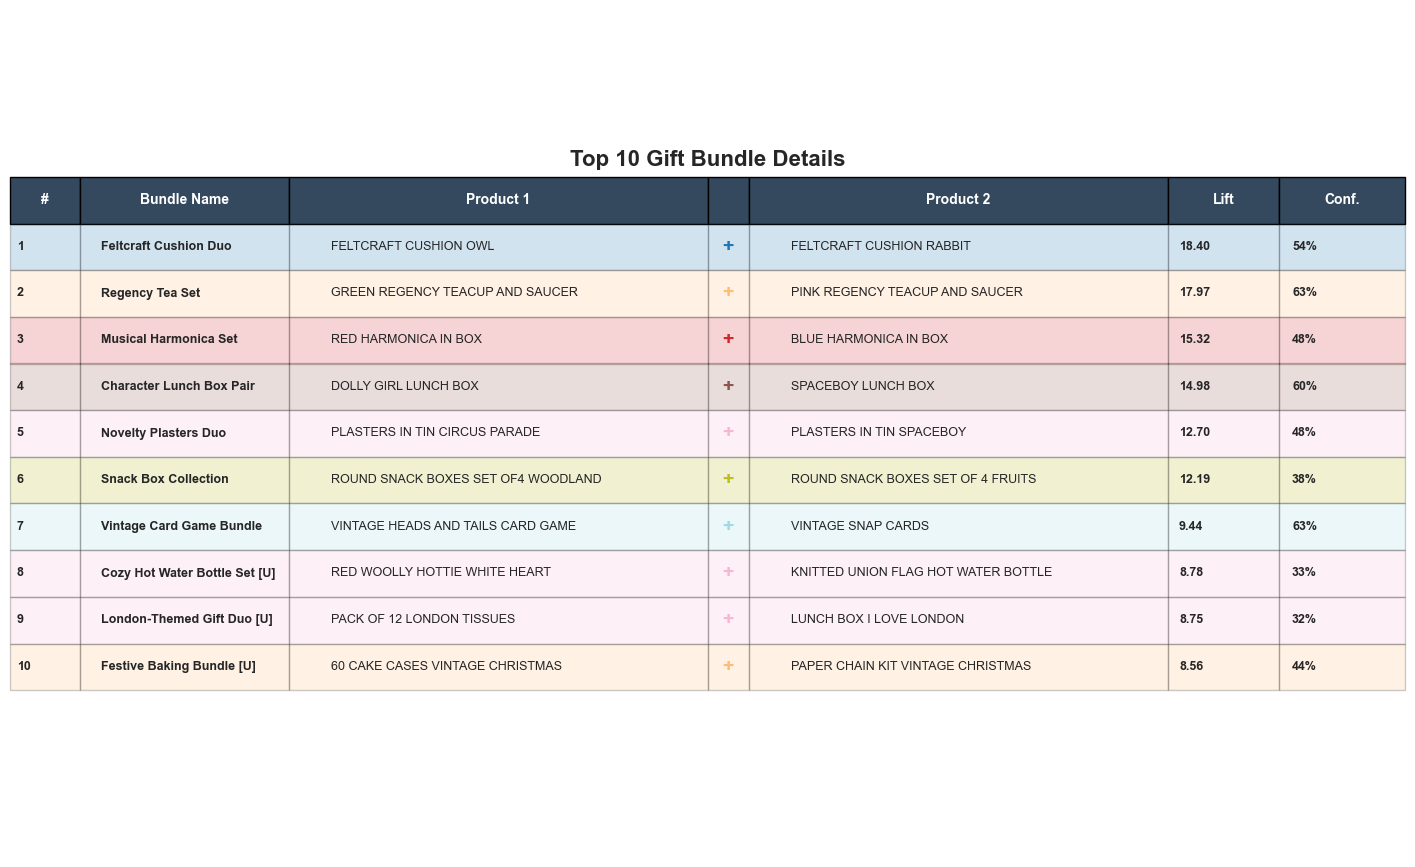

In [10]:
fig, ax = plt.subplots(figsize=(18, 11))
ax.axis('tight')
ax.axis('off')

table_data = []
for idx, row in bundles.iterrows():
    p1 = row['antecedents'][:35] + '...' if len(row['antecedents']) > 35 else row['antecedents']
    p2 = row['consequents'][:35] + '...' if len(row['consequents']) > 35 else row['consequents']
    
    name = row['bundle_name'] + " [U]" if not row['is_matching_set'] else row['bundle_name']
    
    table_data.append([
        f"{idx+1}",
        name,
        p1,
        "+",
        p2,
        f"{row['lift']:.2f}",
        f"{row['confidence']:.0%}"
    ])

columns = ['#', 'Bundle Name', 'Product 1', '', 'Product 2', 'Lift', 'Conf.']
table = ax.table(cellText=table_data, colLabels=columns,
                cellLoc='left', loc='center',
                colWidths=[0.05, 0.15, 0.30, 0.03, 0.30, 0.08, 0.09])

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2.8)

for i, col in enumerate(columns):
    table[(0, i)].set_facecolor('#34495e')
    table[(0, i)].set_text_props(weight='bold', color='white', fontsize=10)

for i in range(len(bundles)):
    color = category_colors[bundles.iloc[i]['category']]
    
    for j in range(len(columns)):
        cell = table[(i+1, j)]
        cell.set_facecolor(color)
        cell.set_alpha(0.2)
        
        if j in [0, 1, 5, 6]:
            cell.set_text_props(weight='bold')
        
        if j == 3:
            cell.set_text_props(ha='center', fontsize=14, weight='bold', color=color)

plt.title('Top 10 Gift Bundle Details', fontsize=16, fontweight='bold', pad=-100, y=0.98)

plt.savefig('../outputs/visualizations/bundle_details_table.pdf', bbox_inches='tight', dpi=300)
plt.savefig('../outputs/visualizations/bundle_details_table.png', bbox_inches='tight', dpi=300)
plt.show()

## Lift distribution

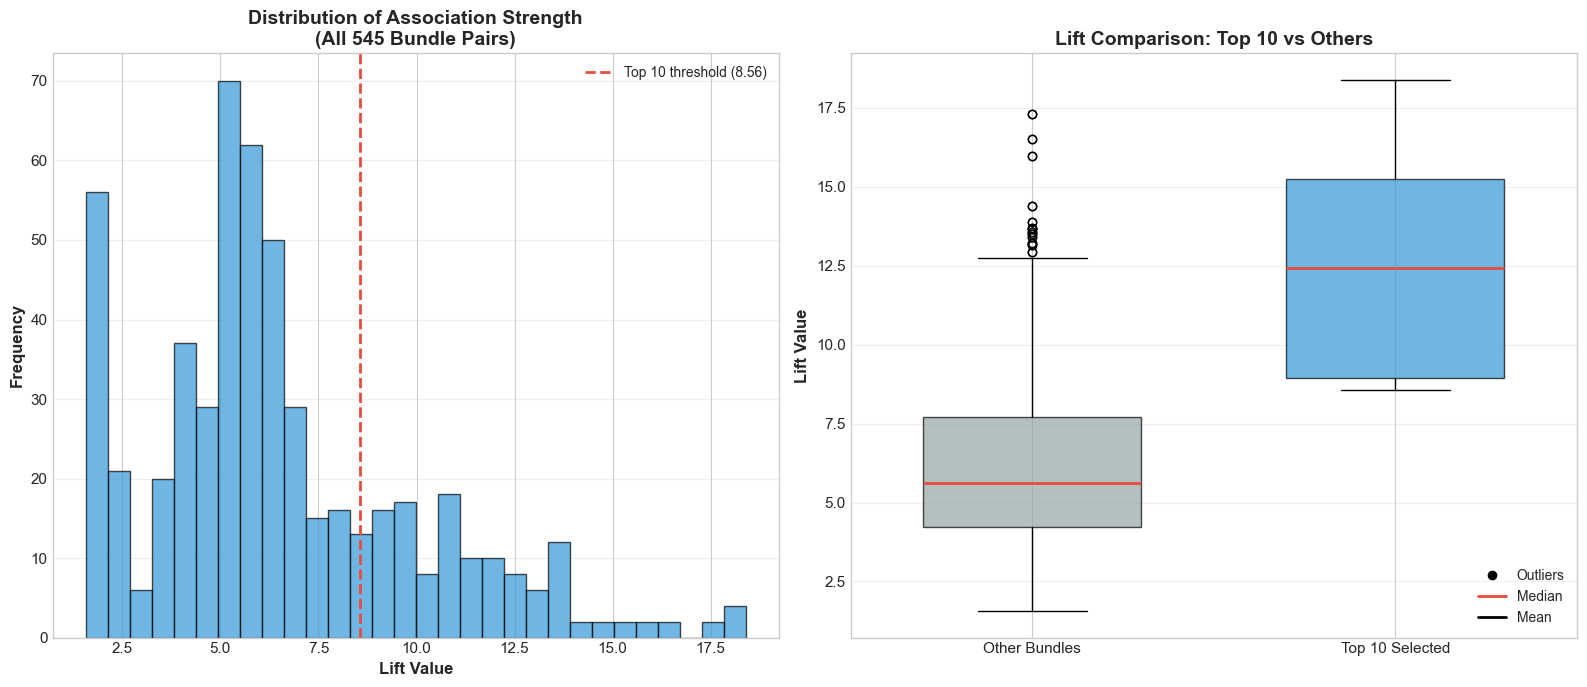

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

ax1.hist(all_pairs['lift'], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
ax1.axvline(bundles['lift'].min(), color='#e74c3c', linestyle='--', 
            linewidth=2, label=f'Top 10 threshold ({bundles["lift"].min():.2f})')
ax1.set_xlabel('Lift Value', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title(f'Distribution of Association Strength\n(All {len(all_pairs)} Bundle Pairs)', 
              fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(axis='y', alpha=0.3)

top_10_lifts = bundles['lift'].values
rest_lifts = all_pairs[~all_pairs['lift'].isin(bundles['lift'])]['lift'].values

bp = ax2.boxplot([rest_lifts, top_10_lifts], 
                 tick_labels=['Other Bundles', 'Top 10 Selected'], 
                 patch_artist=True, widths=0.6,
                 boxprops=dict(facecolor='#95a5a6', alpha=0.7),
                 medianprops=dict(color='#e74c3c', linewidth=2))

bp['boxes'][1].set_facecolor('#3498db')
ax2.set_ylabel('Lift Value', fontsize=12, fontweight='bold')
ax2.set_title('Lift Comparison: Top 10 vs Others', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black', 
           markersize=8, label='Outliers'),
    Line2D([0], [0], color='#e74c3c', linewidth=2, label='Median'),
    Line2D([0], [0], color='black', linewidth=2, label='Mean')
]
ax2.legend(handles=legend_elements, loc='lower right', fontsize=10, frameon=False)

plt.tight_layout()
plt.savefig('../outputs/visualizations/lift_distribution.pdf', bbox_inches='tight', dpi=300)
plt.savefig('../outputs/visualizations/lift_distribution.png', bbox_inches='tight', dpi=300)
plt.show()

## Support vs Confidence scatter

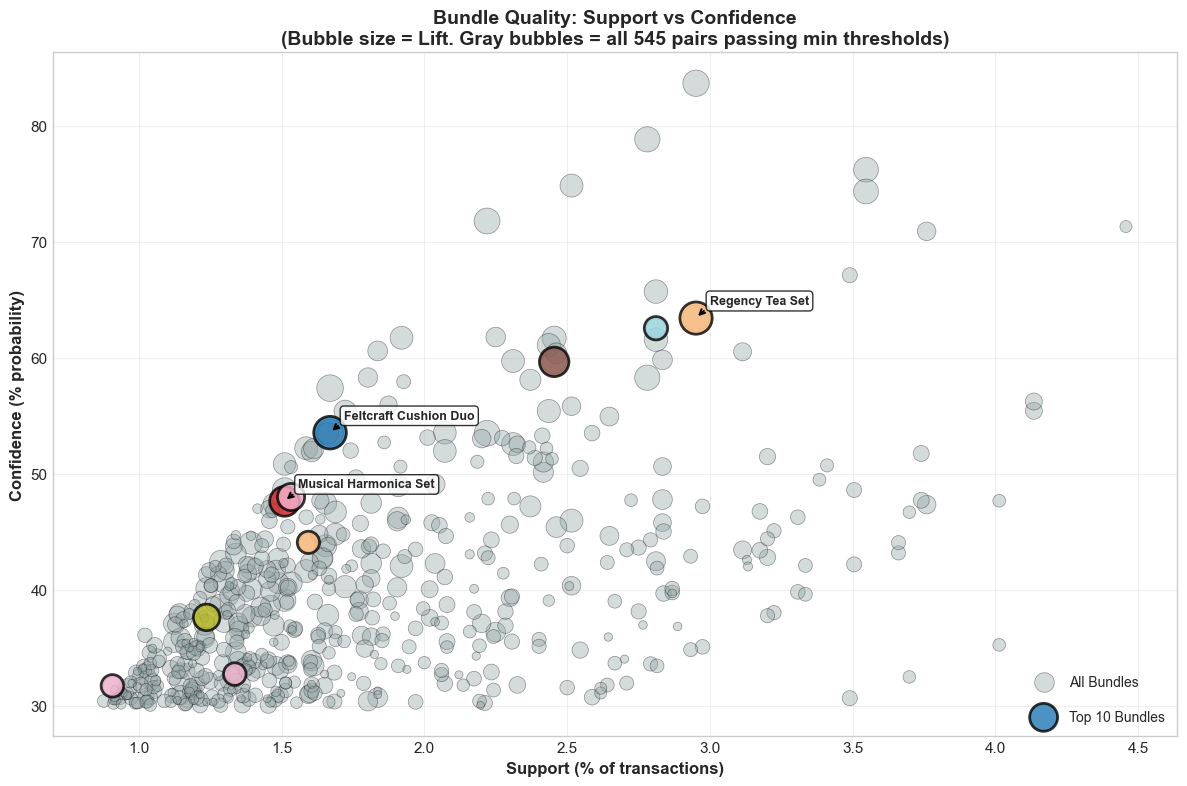

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(all_pairs['support']*100, all_pairs['confidence']*100, 
          s=all_pairs['lift']*20, alpha=0.4, color='#95a5a6', 
          edgecolors='black', linewidths=0.5, label='All Bundles')

colors_scatter = [category_colors[cat] for cat in bundles['category']]
ax.scatter(bundles['support']*100, bundles['confidence']*100,
          s=bundles['lift']*30, alpha=0.8, c=colors_scatter,
          edgecolors='black', linewidths=2, label='Top 10 Bundles')

for idx in range(min(3, len(bundles))):
    row = bundles.iloc[idx]
    ax.annotate(row['bundle_name'], 
               xy=(row['support']*100, row['confidence']*100),
               xytext=(10, 10), textcoords='offset points',
               fontsize=9, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8),
               arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3',
                             color='black', lw=1.5))

ax.set_xlabel('Support (% of transactions)', fontsize=12, fontweight='bold')
ax.set_ylabel('Confidence (% probability)', fontsize=12, fontweight='bold')
ax.set_title('Bundle Quality: Support vs Confidence\n(Bubble size = Lift. Gray bubbles = all 545 pairs passing min thresholds)', 
            fontsize=14, fontweight='bold')
ax.legend(fontsize=10, loc='lower right', labelspacing=1.5)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/visualizations/support_confidence_scatter.pdf', bbox_inches='tight', dpi=300)
plt.savefig('../outputs/visualizations/support_confidence_scatter.png', bbox_inches='tight', dpi=300)
plt.show()

## Confidence distribution by Lift strength

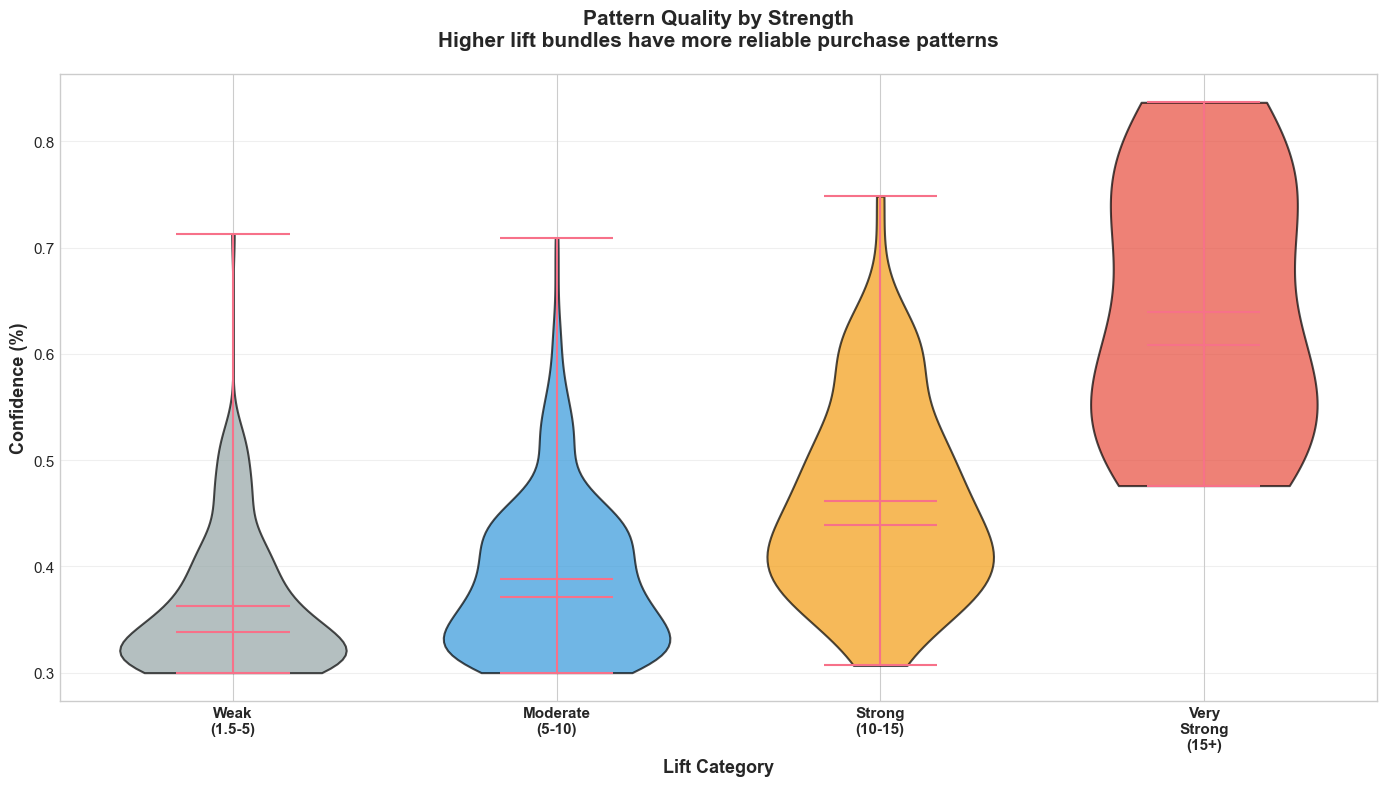

In [13]:
fig, ax = plt.subplots(figsize=(14, 8))

all_pairs_copy = all_pairs.copy()
all_pairs_copy['lift_category'] = pd.cut(all_pairs_copy['lift'], 
                                      bins=[0, 5, 10, 15, 20], 
                                      labels=['Weak (1.5-5)', 'Moderate (5-10)', 
                                             'Strong (10-15)', 'Very Strong (15+)'])

valid_categories = []
valid_data = []
category_labels = ['Weak (1.5-5)', 'Moderate (5-10)', 'Strong (10-15)', 'Very Strong (15+)']
for cat in category_labels:
    data = all_pairs_copy[all_pairs_copy['lift_category'] == cat]['confidence'].values
    if len(data) > 0:
        valid_categories.append(cat)
        valid_data.append(data)

if len(valid_data) > 0:
    parts = ax.violinplot(valid_data, positions=range(1, len(valid_data)+1), 
                         widths=0.7, showmeans=True, showmedians=True)
    
    colors_violin = ['#95a5a6', '#3498db', '#f39c12', '#e74c3c']
    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(colors_violin[i % len(colors_violin)])
        pc.set_alpha(0.7)
        pc.set_edgecolor('black')
        pc.set_linewidth(1.5)
    
    ax.set_xticks(range(1, len(valid_data)+1))
    ax.set_xticklabels([cat.replace(' ', '\n') for cat in valid_categories], 
                       fontsize=11, fontweight='bold')
    ax.set_xlabel('Lift Category', fontsize=13, fontweight='bold')
    ax.set_ylabel('Confidence (%)', fontsize=13, fontweight='bold')
    ax.set_title('Pattern Quality by Strength\nHigher lift bundles have more reliable purchase patterns', 
                fontsize=15, fontweight='bold', pad=20)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/visualizations/confidence_by_lift.pdf', bbox_inches='tight', dpi=300)
plt.savefig('../outputs/visualizations/confidence_by_lift.png', bbox_inches='tight', dpi=300)
plt.show()